In [147]:
import pandas as pd
import numpy as np
import plotly.express as ex
import plotly.graph_objects as go
from scipy.stats import spearmanr

from sklearn.cluster import (
    KMeans,
    DBSCAN,
    OPTICS,
    Birch,
    MeanShift,
    AffinityPropagation,
    AgglomerativeClustering,
    SpectralClustering,
)

from kakarake.parallel_coords import GaussianMixtureclustering


from sklearn import manifold
from collections import OrderedDict
from functools import partial

from time import sleep
from sklearn.preprocessing import MinMaxScaler
from tsp_solver.greedy import solve_tsp

In [148]:
data = pd.read_csv("../c432-88.csv", header=None, sep="\s+")[range(2, 11)]

In [149]:
data = data.rename(columns=dict(zip(range(2,11), range(9))))

In [150]:
distances = spearmanr(data).correlation

In [151]:
distances = - np.abs(distances)

In [152]:
solve_tsp?

Signature:
solve_tsp(
    distances,
    optim_steps=3,
    pairs_by_dist=<function pairs_by_dist at 0x00000176DA90BAF8>,
    endpoints=None,
)
Docstring:
Given a distance matrix, finds a solution for the TSP problem.
Returns list of vertex indices. 
Guarantees that the first index is lower than the last

:arg: distances : left-triangular matrix of distances. array of arrays
:arg: optim_steps (int) number of additional optimization steps, allows to improve solution but costly.
:arg: pairs_by_dist (function) an implementtion of the pairs_by_dist function. for optimization purposes.
:arg: endpoinds : None or pair (int or None, int or None). Specifies start and end nodes of the path. None is unspecified.
File:      c:\projects\.virtualenvs\kakarake\lib\site-packages\tsp_solver\greedy.py
Type:      function


In [153]:
solve_tsp(distances)

[5, 8, 1, 3, 2, 4, 6, 0, 7]

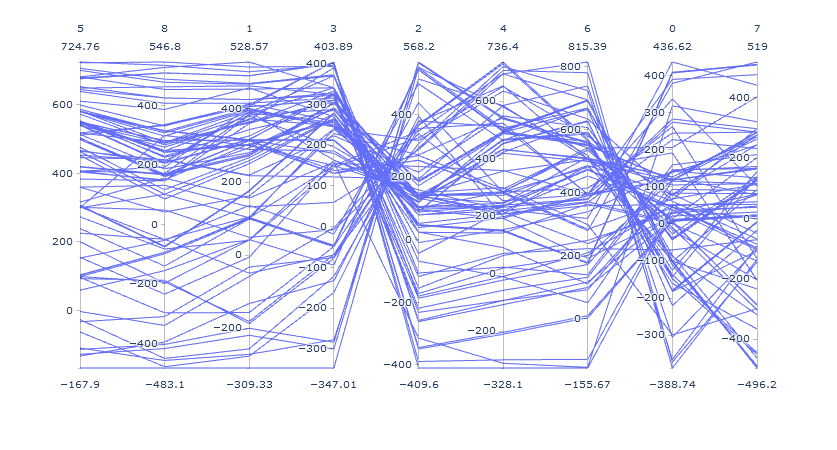

In [154]:
ex.parallel_coordinates(data, dimensions=[5, 8, 1, 3, 2, 4, 6, 0, 7])

In [155]:
corr = spearmanr(data).correlation

In [156]:
objs = [5, 8, 1, 3, 2, 4, 6, 0, 7]

In [157]:
order = np.asarray(list((zip(objs[:-1], objs[1:]))))

In [158]:
ord_corr = corr[order[:,0],order[:,1] ]

In [159]:
axis_signs = np.cumprod(
        np.sign(
            np.hstack(
                (1, ord_corr)
            )
        )
    )

In [160]:
ord_corr

array([ 0.94969046,  0.93253816,  0.81838676, -0.85327487,  0.85596765,
        0.89002739, -0.58605581,  0.73926846])

In [161]:
data = data[objs]

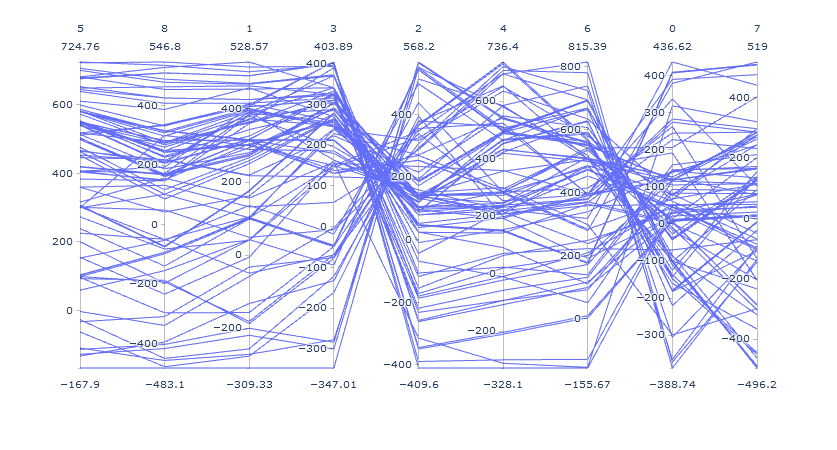

In [162]:
ex.parallel_coordinates(data)

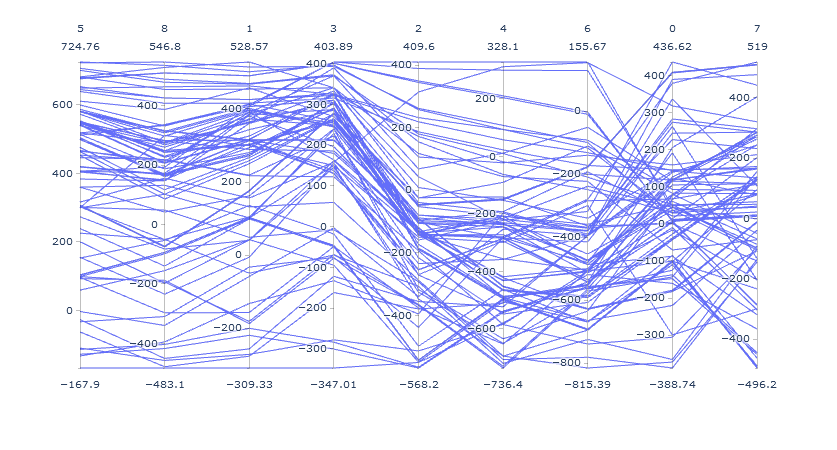

In [163]:
ex.parallel_coordinates(data*axis_signs)

In [164]:
data= data*axis_signs

In [165]:
X = MinMaxScaler().fit_transform(data)

In [166]:
# Compute DBSCAN
db = DBSCAN(eps=1.1, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [168]:
n_neighbors = 10
n_components = 2
# Set-up manifold methods
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')

methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['Modified LLE'] = LLE(method='modified')
methods['Isomap'] = manifold.Isomap(n_neighbors, n_components)
methods['MDS'] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca')

c:\projects\.virtualenvs\kakarake\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning:

Pass n_neighbors=10, n_components=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error



In [173]:
# Plot results
labels = GaussianMixtureclustering(StandardScaler().fit_transform(data))
for i, (label, method) in enumerate(methods.items()):
    Y = method.fit_transform(X)
    print(f"iteration {i}: {label}")
    ex.scatter(x=Y[:,0], y=Y[:,1], color=labels).show()

TypeError: fit_transform() missing 1 required positional argument: 'self'

In [140]:
from sklearn.preprocessing import MinMaxScaler
data = np.asarray([[-1, 2], [-0.5, 6], [0, 10], [1, 18]])

In [141]:
data

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [146]:
scaled_data = data - data.min(axis=0)
scaled_data / scaled_data.max(axis=0)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [175]:
tr = MinMaxScaler().fit(data)

In [177]:
tr.min_

array([0.18808519, 0.46905536, 0.3691755 , 0.46212217, 0.58109523,
       0.6917683 , 0.83969242, 0.47099612, 0.48876464])

In [178]:
tr.data_min_

array([-167.895, -483.097, -309.334, -347.008, -568.217, -736.35 ,
       -815.385, -388.739, -496.188])

In [179]:
tr.data_max_

array([724.759, 546.839, 528.571, 403.893, 409.621, 328.096, 155.667,
       436.616, 519.   ])

In [180]:
tr.data_range_

array([ 892.654, 1029.936,  837.905,  750.901,  977.838, 1064.446,
        971.052,  825.355, 1015.188])

In [184]:
scaled_data = data - data.min(axis=0)
(scaled_data / scaled_data.max(axis=0)).describe()

,5,8,1,3,2,4,6,0,7
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.629878,0.584287,0.641727,0.709109,0.440146,0.408188,0.413661,0.527051,0.532714
std,0.262345,0.257538,0.254317,0.242115,0.238959,0.238996,0.226598,0.219915,0.253812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.516257,0.396745,0.491560,0.636404,0.285980,0.226922,0.259025,0.381327,0.387348
50%,0.707575,0.634686,0.727643,0.797100,0.439673,0.424604,0.351048,0.526191,0.567110
75%,0.807446,0.747227,0.835447,0.875093,0.534053,0.548267,0.585790,0.624108,0.719877
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [185]:
axis_len = corr[order[:,0],order[:,1] ]
axis_len = 1 / np.abs(axis_len)  #  Reciprocal for reverse
axis_len = axis_len / sum(axis_len)
axis_len = axis_len + 0.15  # Minimum distance between axes
axis_len = axis_len / sum(axis_len)
axis_dist = np.cumsum(np.append(0, axis_len))

In [186]:
axis_dist

array([0.        , 0.11667457, 0.23424108, 0.35869593, 0.48084993,
       0.60283413, 0.72275942, 0.86952267, 1.        ])

In [187]:
fig = go.Figure()

In [188]:
fig.add_scatter?

Signature:
fig.add_scatter(
    cliponaxis=None,
    connectgaps=None,
    customdata=None,
    customdatasrc=None,
    dx=None,
    dy=None,
    error_x=None,
    error_y=None,
    fill=None,
    fillcolor=None,
    groupnorm=None,
    hoverinfo=None,
    hoverinfosrc=None,
    hoverlabel=None,
    hoveron=None,
    hovertemplate=None,
    hovertemplatesrc=None,
    hovertext=None,
    hovertextsrc=None,
    ids=None,
    idssrc=None,
    legendgroup=None,
    line=None,
    marker=None,
    meta=None,
    metasrc=None,
    mode=None,
    name=None,
    opacity=None,
    orientation=None,
    r=None,
    rsrc=None,
    selected=None,
    selectedpoints=None,
    showlegend=None,
    stackgaps=None,
    stackgroup=None,
    stream=None,
    t=None,
    text=None,
    textfont=None,
    textposition=None,
    textpositionsrc=None,
    textsrc=None,
    texttemplate=None,
    texttemplatesrc=None,
    tsrc=None,
    uid=None,
    uirevision=None,
    unselected=None,
    visible=None,
  